In [1]:
!pip install contractions
!pip install wordcloud
!pip install gradio
!pip install gensim
!pip install scikit-learn
!pip install tensorflow




[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install nltk
!pip install seaborn



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import contractions
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from gensim.models import word2vec
import gradio as gr
from tensorflow.keras.models import load_model
import pickle

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Text Preprocessing, Tokenization, and Sequence Padding

In [5]:
data = pd.read_csv(r"D:\COLLEGE\aiml\1. Book Review Dataset\Book_review.csv", encoding="ISO-8859-1")
data.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [6]:
data_cleaning = data["reviewText"].dropna()
data = data.drop(columns=['Unnamed: 0'])

In [7]:
def lower_order(text):
    small_order_text = text.lower()
    return small_order_text

In [8]:
def remove_urls(text):
    url_pattern = re.compile(r'http\S+|www\S+|@\w+|#\w+|\d+')
    return url_pattern.sub(r'', text)

In [9]:
def handle_contractions(text):
    contraction_fixed_text = contractions.fix(text)
    return contraction_fixed_text

In [10]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

In [11]:
def remove_punct(text):
    tokenizer = RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(text)
    return ' '.join(tokens)

In [12]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text_tokens):
    result_tokens = []
    for token in text_tokens:
        if token not in stop_words:
            result_tokens.append(token)
    return result_tokens

In [13]:
def lemmatization(token_text):
    lemma_tokens = []
    wordnet = WordNetLemmatizer()
    lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]
    return lemmatized_tokens

In [14]:
def text_cleaning_pipeline(dataset):
    # Convert the input to lower order.
    data = lower_order(dataset)
    
    # Remove URLs
    data = remove_urls(data)

    #Handle Contractions
    data = handle_contractions(data)
    
    # Remove emojis
    data = remove_emoji(data)
  
    # Remove punctuations.
    data = remove_punct(data)
  
    # Create tokens.
    tokens = data.split()
  
    # Remove stopwords:
    tokens = remove_stopwords(tokens)

    #Lemmatize words:
    tokens = lemmatization(tokens)

    return " ".join(tokens)

In [15]:
sample = "Hello @deeya 👋🏾, I still want us to hit that new sushi spot??? LMK when you're free cuz I can't go this or next weekend since I'll be swimming!!! #sushiBros #rawFish #🍱"
print(text_cleaning_pipeline(sample))

hello still want us hit new sushi spot lmk free cuz cannot go next weekend since swim


In [16]:
test = data["reviewText"][0]
print(text_cleaning_pipeline(test))

book first bookmobile book buy school book club love story bet dollar donut love memory serve buy book th grade would look forward relive memories


In [17]:
cleaned_tokens = data["reviewText"].apply(lambda dataset: text_cleaning_pipeline(dataset))

In [18]:
data['cleaned_text'] = data['reviewText'].apply(lambda dataset: text_cleaning_pipeline(dataset))

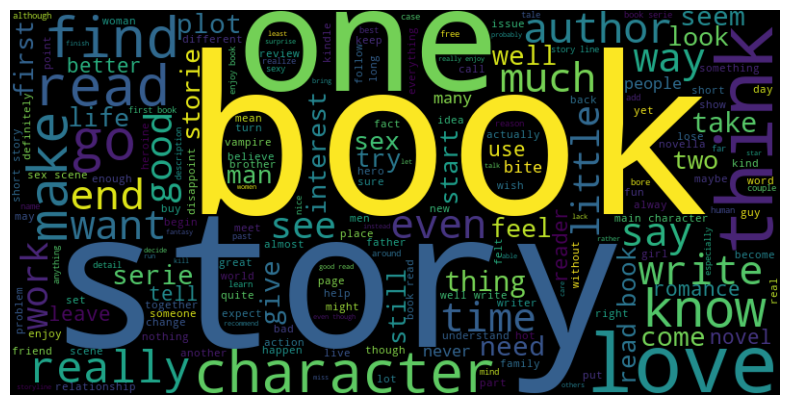

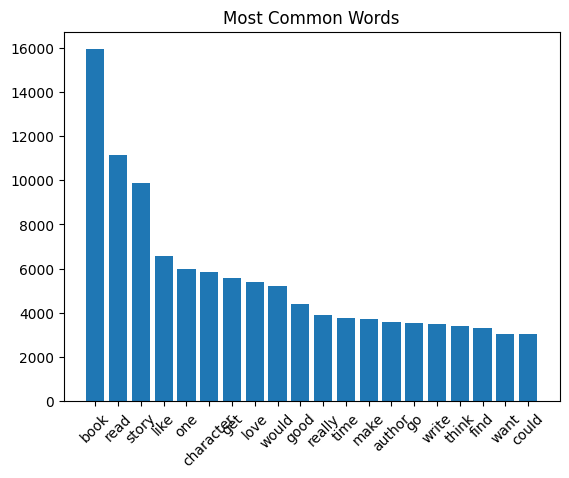

In [19]:
all_words = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)

plt.bar(*zip(*common_words))
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [22]:
print(data.columns)

Index(['rating', 'reviewText', 'summary', 'cleaned_text'], dtype='object')


In [23]:
X = data['cleaned_text'].values
y = data['rating'].astype('float32').values  # Keep ratings as float for regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Percentile-based padding
lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(lengths, 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


In [24]:
# Model 1 - SimpleRNN
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model1.add(SimpleRNN(units=64, return_sequences=False))
model1.add(Dense(units=1, activation='linear'))  # Regression output

model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [25]:
# Model 2 - LSTM
from tensorflow.keras import regularizers

model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model2.add(LSTM(units=64, return_sequences=False))
model2.add(Dropout(0.5))  # Dropout
model2.add(Dense(units=1, activation='linear', kernel_regularizer=regularizers.l2(0.01)))  #L2 regularization

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history1 = model1.fit(X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=128, callbacks=[early_stop])

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 1.9837 - mae: 1.2338 - val_loss: 2.0156 - val_mae: 1.2447
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 1.9726 - mae: 1.2283 - val_loss: 2.0372 - val_mae: 1.2437
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 1.9449 - mae: 1.2098 - val_loss: 2.0353 - val_mae: 1.2471
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 1.9476 - mae: 1.2018 - val_loss: 2.0250 - val_mae: 1.2455


In [33]:
history2 = model2.fit(X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=128, callbacks=[early_stop])

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 5.1310 - mae: 1.8461 - val_loss: 2.0859 - val_mae: 1.2544
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 2.3127 - mae: 1.3003 - val_loss: 2.0482 - val_mae: 1.2502
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 2.2460 - mae: 1.2895 - val_loss: 2.0439 - val_mae: 1.2500
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 2.2513 - mae: 1.2909 - val_loss: 2.0429 - val_mae: 1.2491
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 2.2374 - mae: 1.2877 - val_loss: 2.0715 - val_mae: 1.2469
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.2181 - mae: 1.2843 - val_loss: 2.0562 - val_mae: 1.2463
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.1465 - mae: 1.2595 - val_loss: 2.0441 - val_mae: 1.2452


In [34]:
history3 = model3.fit(X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=128, callbacks=[early_stop])

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 635ms/step - loss: 4.4510 - mae: 1.7215 - val_loss: 2.0796 - val_mae: 1.2491
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 710ms/step - loss: 2.2379 - mae: 1.2868 - val_loss: 2.0770 - val_mae: 1.2488
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 862ms/step - loss: 2.2389 - mae: 1.2905 - val_loss: 2.1143 - val_mae: 1.2694
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 59s 993ms/step - loss: 2.2015 - mae: 1.2753 - val_loss: 2.1640 - val_mae: 1.2930
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - loss: 2.2021 - mae: 1.2853 - val_loss: 2.3329 - val_mae: 1.3520


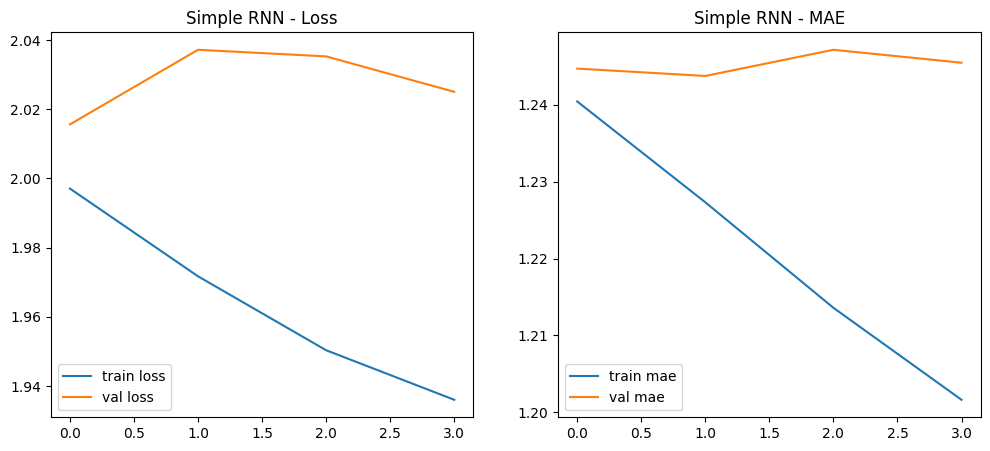

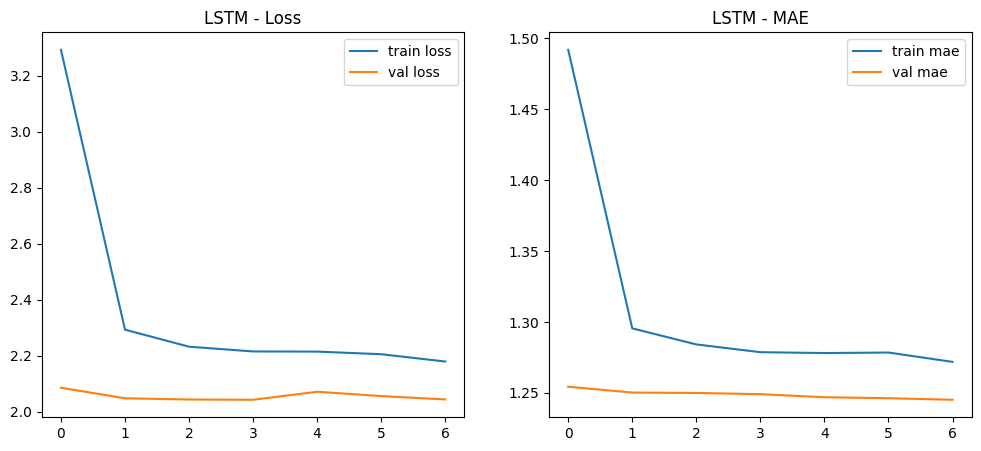

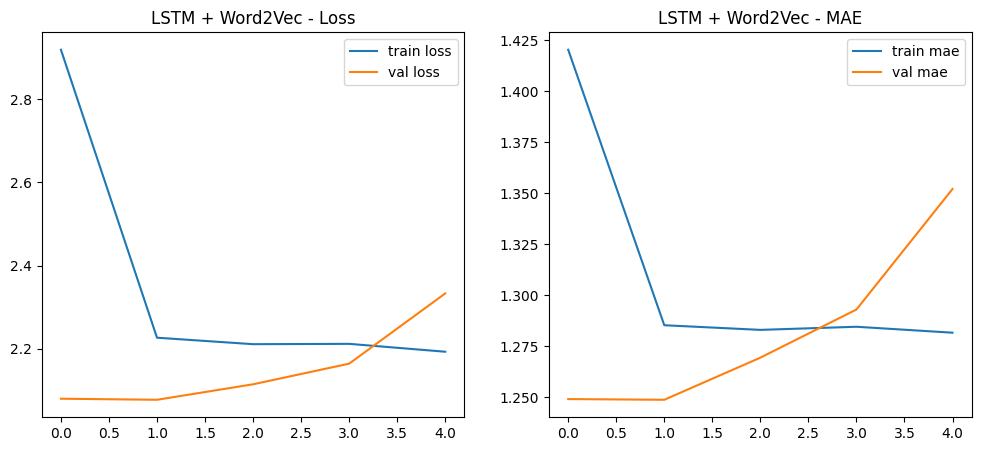

In [35]:
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    # MAE (Mean Absolute Error) for regression models
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='train mae')
    plt.plot(history.history['val_mae'], label='val mae')
    plt.title(f'{title} - MAE')
    plt.legend()
    
    plt.show()

# Call the function to plot the history
plot_history(history1, "Simple RNN")
plot_history(history2, "LSTM")
plot_history(history3, "LSTM + Word2Vec")


In [54]:
def evaluate_model(model, X_test_pad, y_test_encoded):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes), annot=True, fmt='d')
    plt.show()

evaluate_model(model1, X_test, y_test)
evaluate_model(model2, X_test, y_test)
evaluate_model(model3, X_test, y_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(32,), dtype=float32). Expected shape (128, 181), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=string)
  • training=False
  • mask=None

In [36]:
import pickle
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [37]:
# Save Model 1: Simple RNN
model1.save("model_rnn.keras")

# Save Model 2: LSTM
model2.save("model_lstm.keras")

# Save Model 3: LSTM + Word2Vec
model3.save("model_lstm_word2vec.keras")

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [38]:
# Load models
model1 = load_model("model_rnn.keras")
model2 = load_model("model_lstm.keras")
model3 = load_model("model_lstm_word2vec.keras")

# Load tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Padding length (same as training)
MAX_LEN = 50

# Text cleaning function (implement your actual cleaning logic here)
def text_cleaning_pipeline(text):
    return text.lower()

def preprocess_text(text):
    cleaned = text_cleaning_pipeline(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    pad = pad_sequences(seq, maxlen=MAX_LEN, padding='post')
    return pad

# Define the prediction function for Gradio
def predict_rating(review_text, model_choice):
    # Preprocess the text
    processed = preprocess_text(review_text)

    # Select the model based on user choice
    if model_choice == "Simple RNN":
        prediction = model1.predict(processed)
    elif model_choice == "LSTM":
        prediction = model2.predict(processed)
    else:  # Model choice is "LSTM with Word2Vec"
        prediction = model3.predict(processed)

    # If regression: round to 1 decimal, if classification: argmax + 1 (since ratings are 1–5)
    if prediction.shape[1] == 1:  # Regression output
        predicted_rating = round(float(prediction[0][0]), 1)
    else:  # Classification output (softmax)
        predicted_rating = int(np.argmax(prediction, axis=1)[0]) + 1

    return f"⭐ Predicted Rating: **{predicted_rating} / 5**"

# Define the Gradio interface
iface = gr.Interface(
    fn=predict_rating,
    inputs=[
        gr.Textbox(label="📝 Book Review", lines=6, placeholder="Enter the book review here..."),
        gr.Radio(choices=["Simple RNN", "LSTM", "LSTM with Word2Vec"], label="Choose a model for prediction")
    ],
    outputs="text",
    title="📦Book Rating Predictor",
    description="This tool predicts a rating (1 to 5 stars) for a given product review using your selected model.",
    theme="huggingface",
    css="""
        .container {
            background-color: #F2B138;
            color: white;
            border-radius: 10px;
        }
        .footer {
            display: none;
        }
        .gradio-container {
            background-color: #D9E3F0;
            border-radius: 15px;
            padding: 20px;
            font-family: Arial, sans-serif;
        }
        .gradio-button {
            background-color: #062356;
            color: white;
            border-radius: 5px;
            font-size: 16px;
        }
        .gradio-button:hover {
            background-color: #0C45A7;
        }
        .gr-radio label {
            color: #062356;
            font-size: 18px;
        }
        .gr-textbox input {
            background-color: #ffffff;
            border-radius: 5px;
        }
    """
)

# Launch the interface
iface.launch()

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py:1116: UserWarning: Cannot load huggingface. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/huggingface (Request ID: Root=1-68205e6e-19f4e7b435e5a5cf30608191;f112409d-a507-4b87-b620-c469dfbec69a)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [28]:
# Model 3 - LSTM with Pretrained Embeddings i.e.Word2Vec
from gensim.models import Word2Vec
import gensim.downloader as api

w2v_model = api.load('word2vec-google-news-300')

embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.key_to_index:  # Corrected to key_to_index
        embedding_matrix[i] = w2v_model[word]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Build the model
model3 = Sequential()

# Embedding Layer (trainable)
model3.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_len, 
                     weights=[embedding_matrix], 
                     trainable=True))

# Bidirectional LSTM with dropout
model3.add(Bidirectional(LSTM(128, return_sequences=True)))
model3.add(Dropout(0.5))

# Second LSTM layer
model3.add(LSTM(64))
model3.add(Dropout(0.5))

# Dense layers
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='linear'))  # For regression (rating prediction)

# Compile the model
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])